In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
import pickle
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick

from os import mkdir
from os.path import isdir

rcParams = {'font.size': 30 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}
plt.rcParams.update(rcParams)



In [2]:
plt.rcParams.update(rcParams)

data_dir = '/Users/harihara/Research-Activities/Data/SCRAPT/Lupus-Microbiome-MT/'
alpha = 0.1
dnaclust_times = {0.99:19,0.98:13,0.97:8,0.96:5,0.95:4}
uclust_times = {0.99:83, 0.98:43,0.97:30,0.96:15,0.95:10.0}
cdhit_times = {0.99:63, 0.98:26, 0.97:22, 0.96:26, 0.95:25}
scrapt_times = {}
for s in [0.99, 0.98, 0.97, 0.96, 0.95]:
    pkl = pickle.load(open(data_dir+'sim_'+str(s)+'.pkl', 'rb'))
    time = pkl[alpha]['Adaptive_With_Modeshifting']['Cluster_Summary']['Time(Total)'].sum()
    scrapt_times[s] = time

df = pd.DataFrame()
df['Similarity'] = list(dnaclust_times.keys())
df['DNACLUST'] = list(dnaclust_times.values())
df = df.set_index('Similarity')
df['SCRAPT'] = scrapt_times.values()
df['CDHIT'] = cdhit_times.values()
df['UCLUST'] = uclust_times.values()


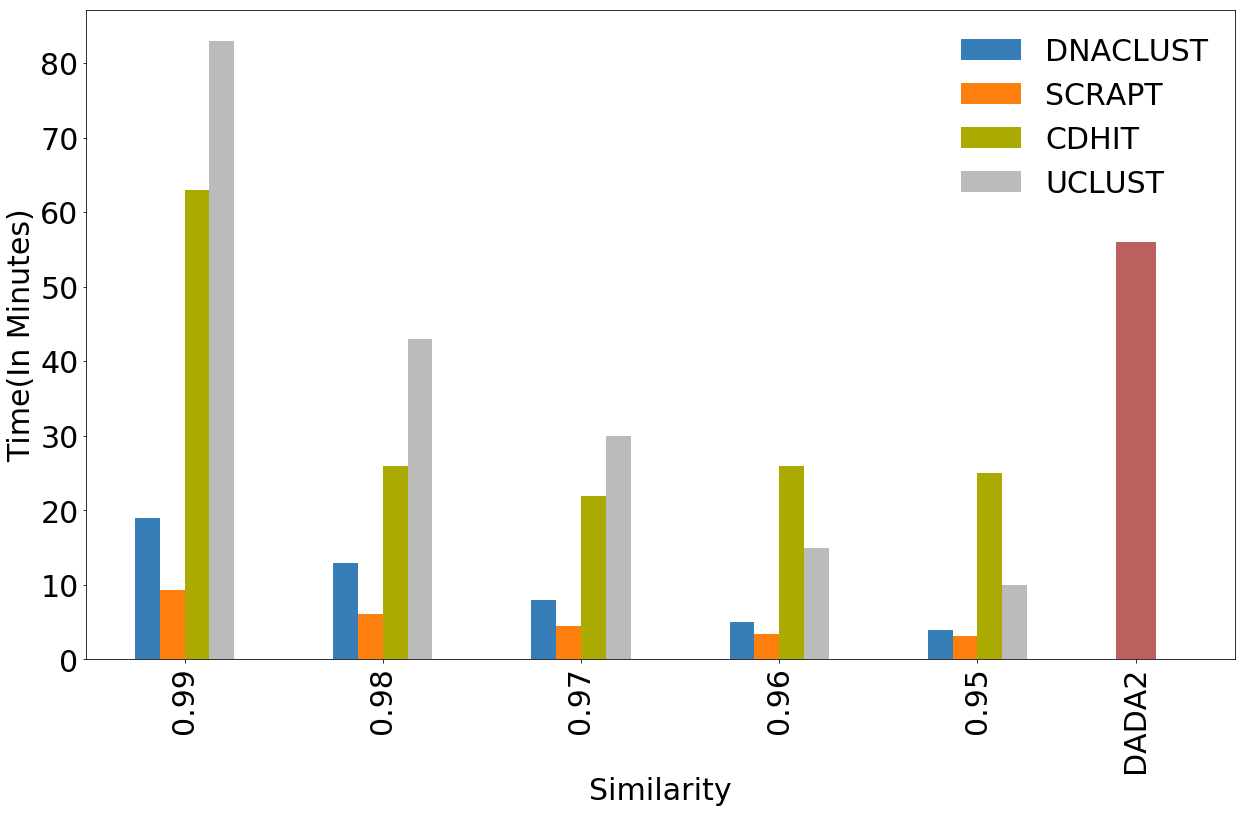

In [3]:
fig, ax = plt.subplots(1,1,figsize = (18,12))
df.plot(ax = ax, kind = 'bar', color = ['#377eb8','C1', '#AAAA00','#bbbbbb','#000000'])
ax.bar(x = 4.8, height = 56, width = 0.2, color = 'brown', alpha = 0.75)
ax.set_xticks([0,1,2,3,4,4.8])
ax.set_xticklabels(['0.99','0.98','0.97','0.96','0.95','DADA2'])
ax.set_xlim([-0.5,5.3])
ax.set_ylabel('Time(In Minutes)')
ax.legend(frameon = False)
fig.tight_layout()
fig.savefig('/Users/harihara/Research-Activities/Plots/Iterative_Clustering/Lupus-Microbiome-MT/Time_Benchmarks.pdf')

In [4]:
plt.rcParams.update(rcParams)


data_dir = '/Users/harihara/Research-Activities/Data/SCRAPT/Spatial_Soil/'
scrapt_times = {}
cdhit_times_16 = {0.99:5043, 0.98:2030, 0.97:1420, 0.96:857, 0.95:729}
cdhit_times_8 = {0.99:np.nan, 0.98:3227, 0.97:1906, 0.96:1717, 0.95:1490}
uclust_times = {0.99:np.nan, 0.98:np.nan,0.97:np.nan,0.96:np.nan,0.95:np.nan}
dnaclust_times = {0.99:184, 0.98:836, 0.97:863, 0.96:1053, 0.95:758}

for s in [0.99, 0.98, 0.97, 0.96, 0.95]:
    pkl = pickle.load(open(data_dir+'sim_'+str(s)+'.pkl', 'rb'))
    time = pkl[alpha]['Adaptive_With_Modeshifting']['Cluster_Summary']['Time(Total)'].sum()
    scrapt_times[s] = time
    
df = pd.DataFrame()
df['Similarity'] = list(dnaclust_times.keys())
df['DNACLUST'] = list(dnaclust_times.values())
df = df.set_index('Similarity')
df['SCRAPT'] = scrapt_times.values()
df['CDHIT'] = cdhit_times_16.values()
#df['UCLUST'] = uclust_times.values()

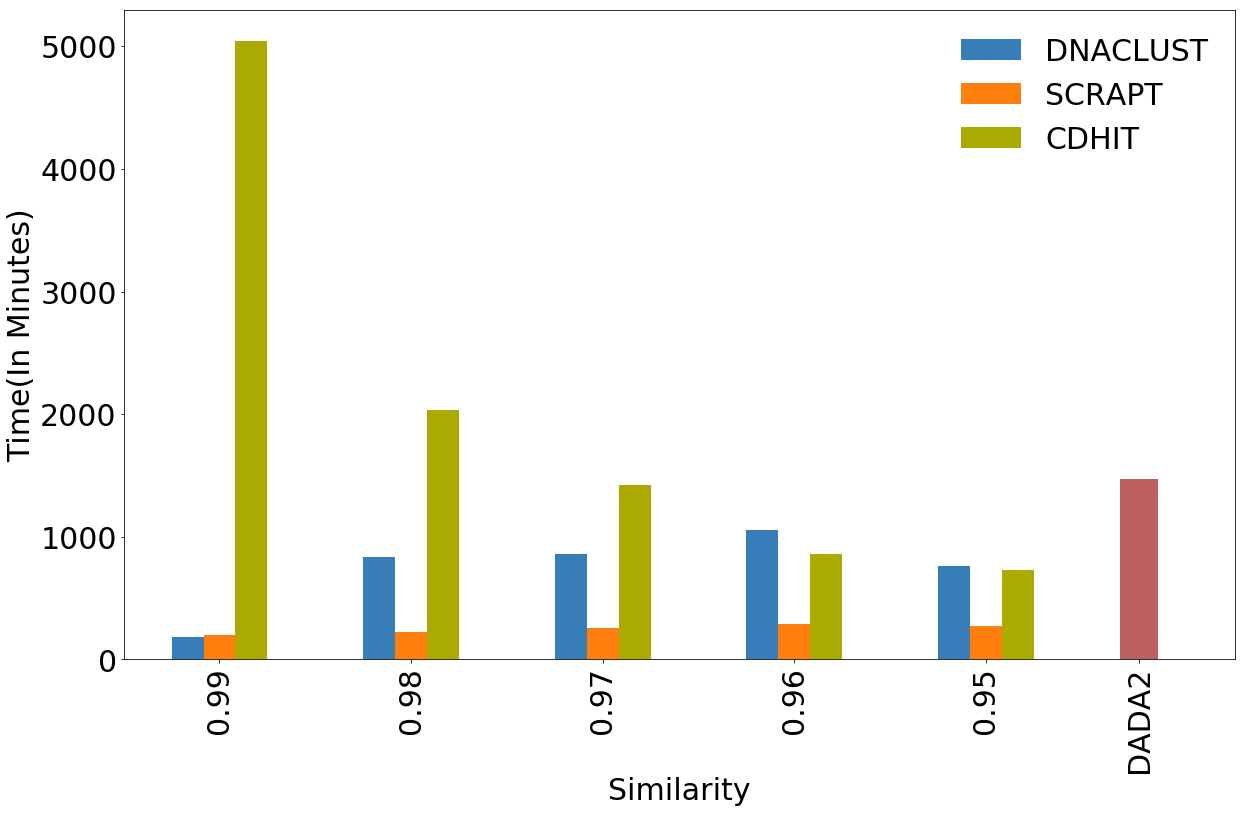

In [5]:
fig, ax = plt.subplots(1,1,figsize = (18,12))
df.plot(ax = ax, kind = 'bar', color = ['#377eb8','C1', '#AAAA00','#bbbbbb','#000000'])
ax.bar(x = 4.8, height = 1470, width = 0.2, color = 'brown', alpha = 0.75)
ax.set_xticks([0,1,2,3,4,4.8])
ax.set_xticklabels(['0.99','0.98','0.97','0.96','0.95','DADA2'])
ax.set_xlim([-0.5,5.3])
ax.set_ylabel('Time(In Minutes)')
ax.legend(frameon = False)
fig.tight_layout()
fig.savefig('/Users/harihara/Research-Activities/Plots/Iterative_Clustering/Spatial_Soil/Time_Benchmarks.pdf')